In [1]:
!git clone https://github.com/fastai/course-v4 'drive/My Drive/course-v4'


Cloning into 'drive/My Drive/course-v4'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 357 (delta 13), reused 14 (delta 6), pack-reused 333
Receiving objects: 100% (357/357), 42.77 MiB | 52.51 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Checking connectivity... done.


In [2]:
!pip install fastai2


In [3]:
from fastai2 import *
!pip install graphviz ipywidgets matplotlib nbdev>=0.2.12 pandas scikit_learn

In [4]:
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

In [5]:
!pip install azure-cognitiveservices-search-imagesearch


In [6]:
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

In [7]:
from fastai2.vision.all import *
!pip install utils
from utils import *
from fastai2.vision.widgets import *

In [8]:
key = '173e7aa99dc34bdeabacd319ac5c4a92'


In [9]:
def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)

In [33]:
results = search_images_bing(key, 'girls kids')
ims = results.attrgot('content_url')
len(ims)

150

In [34]:
ims[0]


'https://ae01.alicdn.com/kf/HTB1Ab7sKpXXXXb_XpXXq6xXFXXXO/Wholesale-Beaded-Spaghetti-Straps-Unique-Fashion-Short-Girl-Kids-Pageant-Dress-Dress-Bridesmaid-Dance-Party-Princess.jpg'

In [35]:
kids= 'girls', 'boys'


In [36]:
path = Path('media')
if not path.exists():
    path.mkdir()
    for o in kids:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} kids')
        download_images(dest, urls=results.attrgot('content_url'))

In [37]:
fns = get_image_files(path)
fns

(#299) [Path('media/girls/00000000.jpg'),Path('media/girls/00000007.jpg'),Path('media/girls/00000006.jpg'),Path('media/girls/00000003.jpg'),Path('media/girls/00000002.jpg'),Path('media/girls/00000009.jpg'),Path('media/girls/00000008.jpg'),Path('media/girls/00000011.jpg'),Path('media/girls/00000012.jpg'),Path('media/girls/00000014.jpg')...]

In [38]:
fns[0]


Path('media/girls/00000000.jpg')

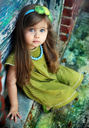

In [39]:
to_see= 'media/girls/00000000.jpg'
download_url(fns[0], to_see)
im = Image.open(to_see)
im.to_thumb(128,128)

In [40]:
!pip install Pillow
from PIL import Image

In [41]:
!pip install webp


In [42]:
failed = verify_images(fns)
failed

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be ide

(#44) [Path('media/girls/00000006.jpg'),Path('media/girls/00000003.jpg'),Path('media/girls/00000008.jpg'),Path('media/girls/00000011.jpg'),Path('media/girls/00000012.jpg'),Path('media/girls/00000015.jpg'),Path('media/girls/00000004.jpg'),Path('media/girls/00000005.jpg'),Path('media/girls/00000013.jpg'),Path('media/girls/00000016.jpg')...]

In [43]:
failed.map(Path.unlink);


In [44]:
media_data = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [45]:
dls= media_data.dataloaders(path)


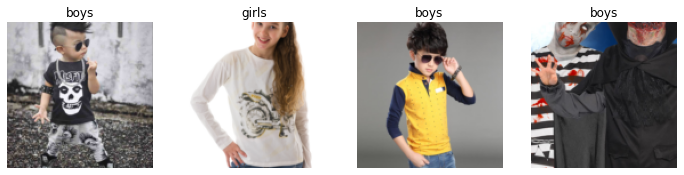

In [46]:
dls.valid.show_batch(max_n=4, nrows=1)


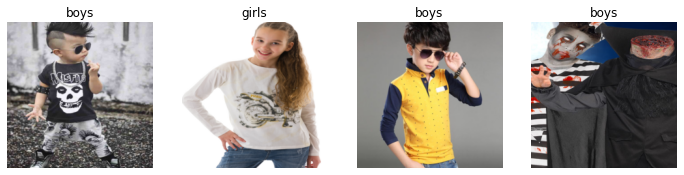

In [47]:
media_data = media_data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = media_data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [48]:
learn= cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.210006,1.405130,0.407895,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.013736,0.789033,0.289474,00:04
1,0.788563,0.449553,0.197368,00:04
2,0.652983,0.358440,0.157895,00:05
3,0.573337,0.324824,0.118421,00:05


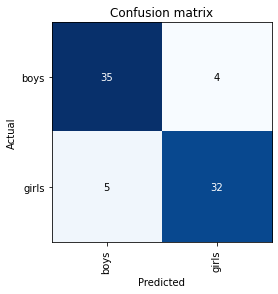

In [49]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

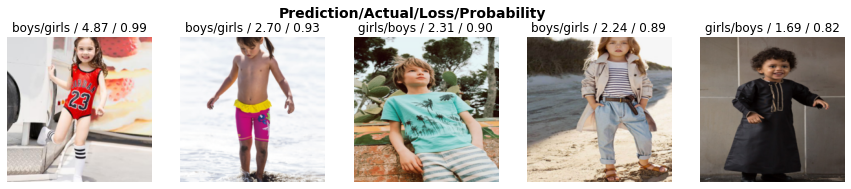

In [50]:
interp.plot_top_losses(5, nrows=1)


In [51]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [55]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [56]:
learn.export()


In [57]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
learn_inf = load_learner(path/'export.pkl', cpu=True)


In [59]:
learn_inf.predict('media/girls/00000000.jpg')


('girls', tensor(1), tensor([0.0177, 0.9823]))

In [60]:
learn_inf.dls.vocab


(#2) ['boys','girls']

In [61]:
!pip install ipywidgets


In [62]:
!pip install Voila

     |████████████████████████████████| 5.9 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 69.6 MB/s eta 0:00:01


In [63]:
from IPython.display import display
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [64]:
img = PILImage.create(btn_upload.data[-1])


In [65]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [66]:
pred,pred_idx,probs = learn_inf.predict(img)


In [67]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: boys; Probability: 0.9882')

In [68]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [69]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [70]:
btn_upload = widgets.FileUpload()


In [72]:
VBox([widgets.Label('Am I represented?'), 
      btn_upload, btn_run, out_pl, lbl_pred])